# Wine Quality Prediction
## Task: Use the dataset of red variants of the Portuguese “Vinho Verde” wine to predict the quality of the wine produced

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
wine = pd.read_csv('../../Wine Quality/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Exploration

In [5]:
# This function plots the varation of features as against the quality
#Can give us better insights on the powerful deciding features on the quality of the wines
def barPlot(column):
    '''
    column takes the value of the current column feature which is used to plot against the quality of the wine.
    '''
    fig = plt.figure(figsize = (15,6))
    sns.barplot('quality', column, data=wine)
    plt.show()

### The quality of wine is a continous variable therefore we will use a linear regression model.

In [6]:
#Target variable
#Independent variable
targ = ['quality']
pred_col = [x for x in wine.columns if x not in targ]

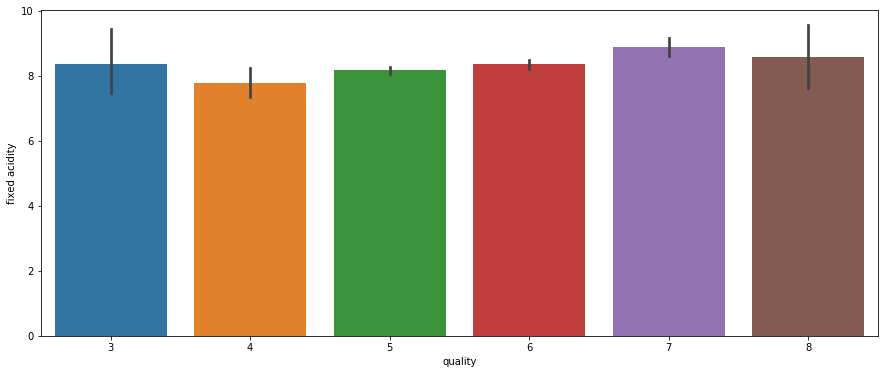

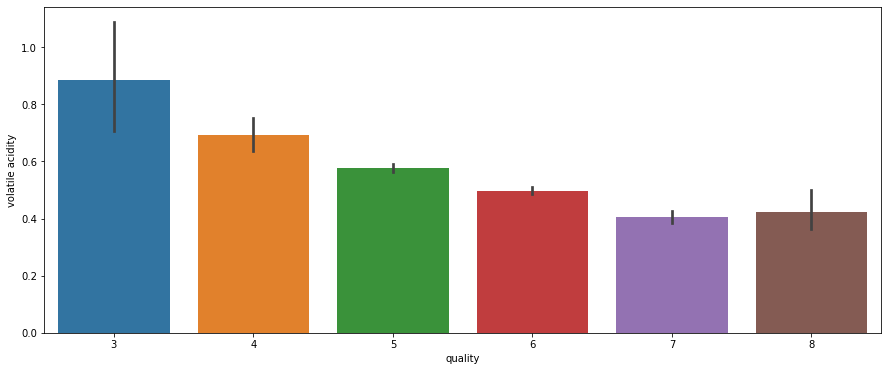

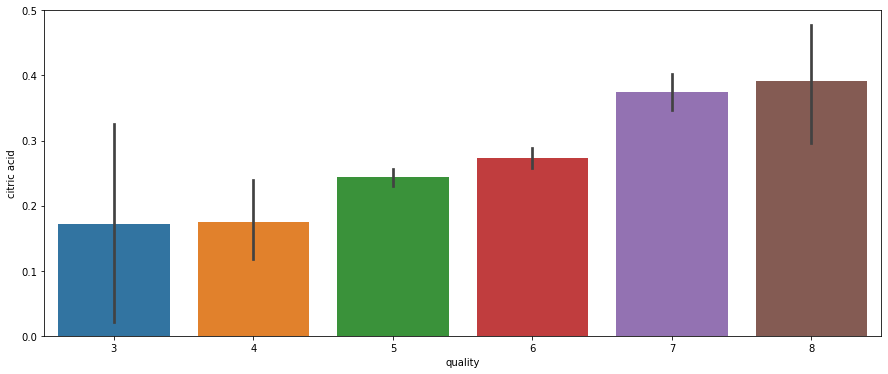

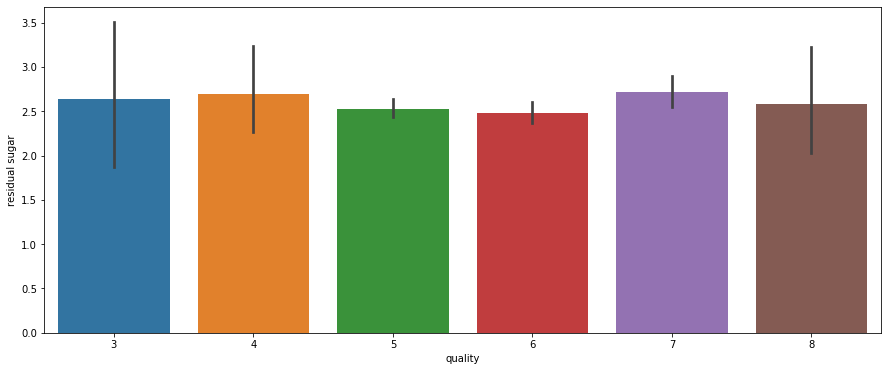

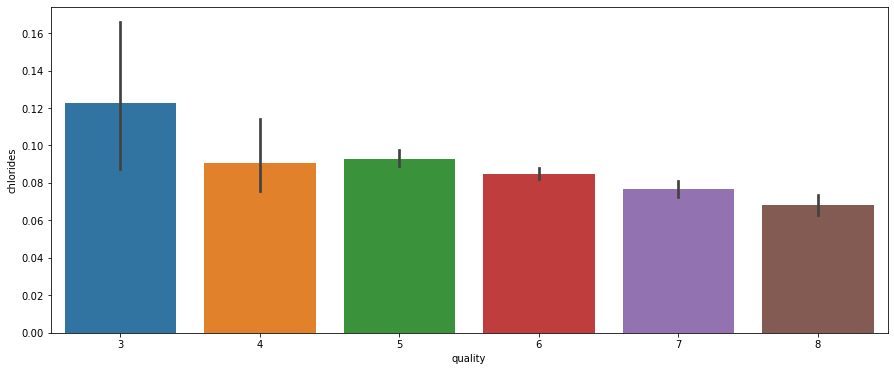

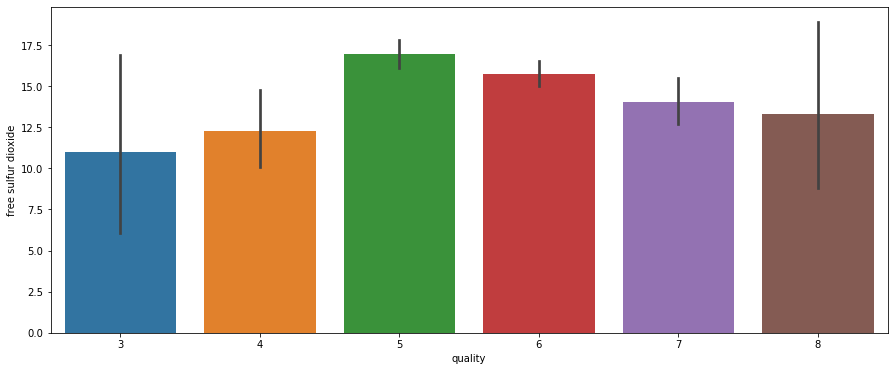

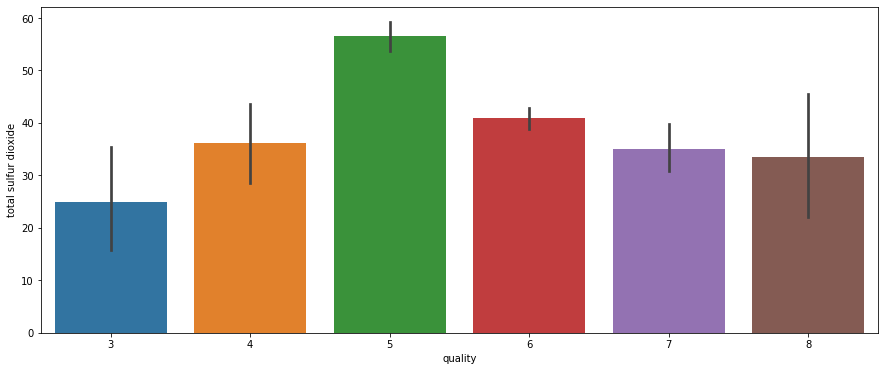

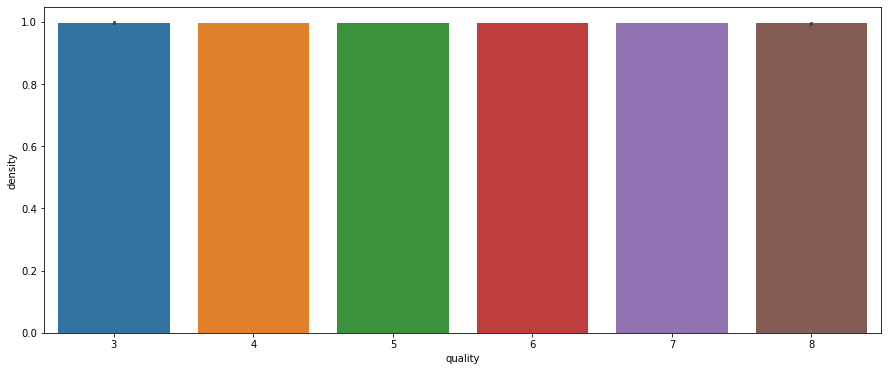

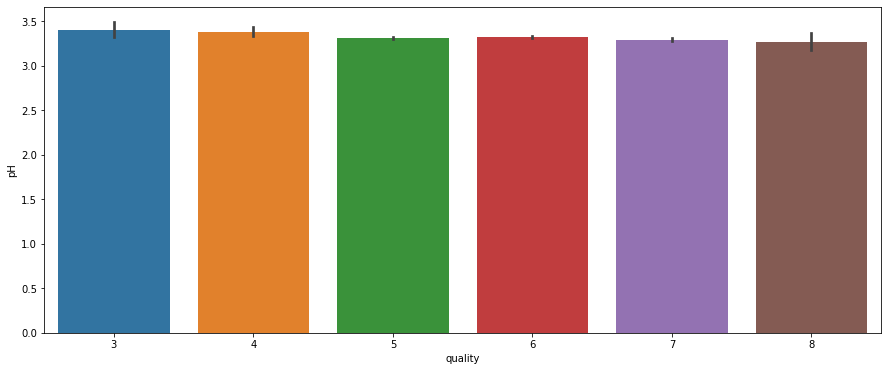

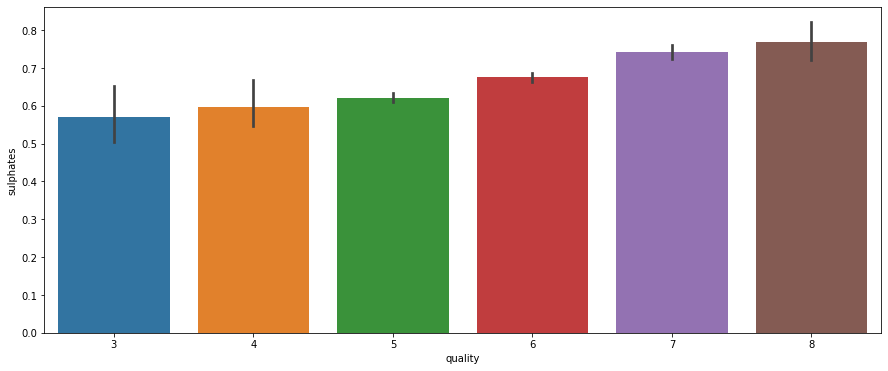

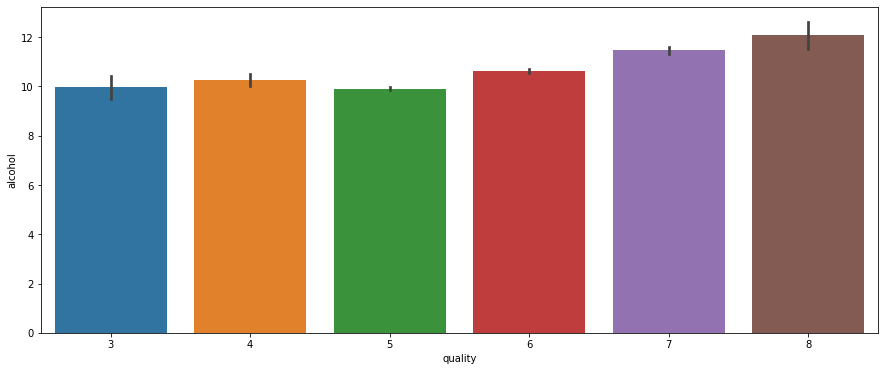

In [7]:
#Plotting the predictors against the wine quality
for i in pred_col:
    barPlot(i)

# Data summary


In [8]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Check for null values

In [9]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check for colinearity

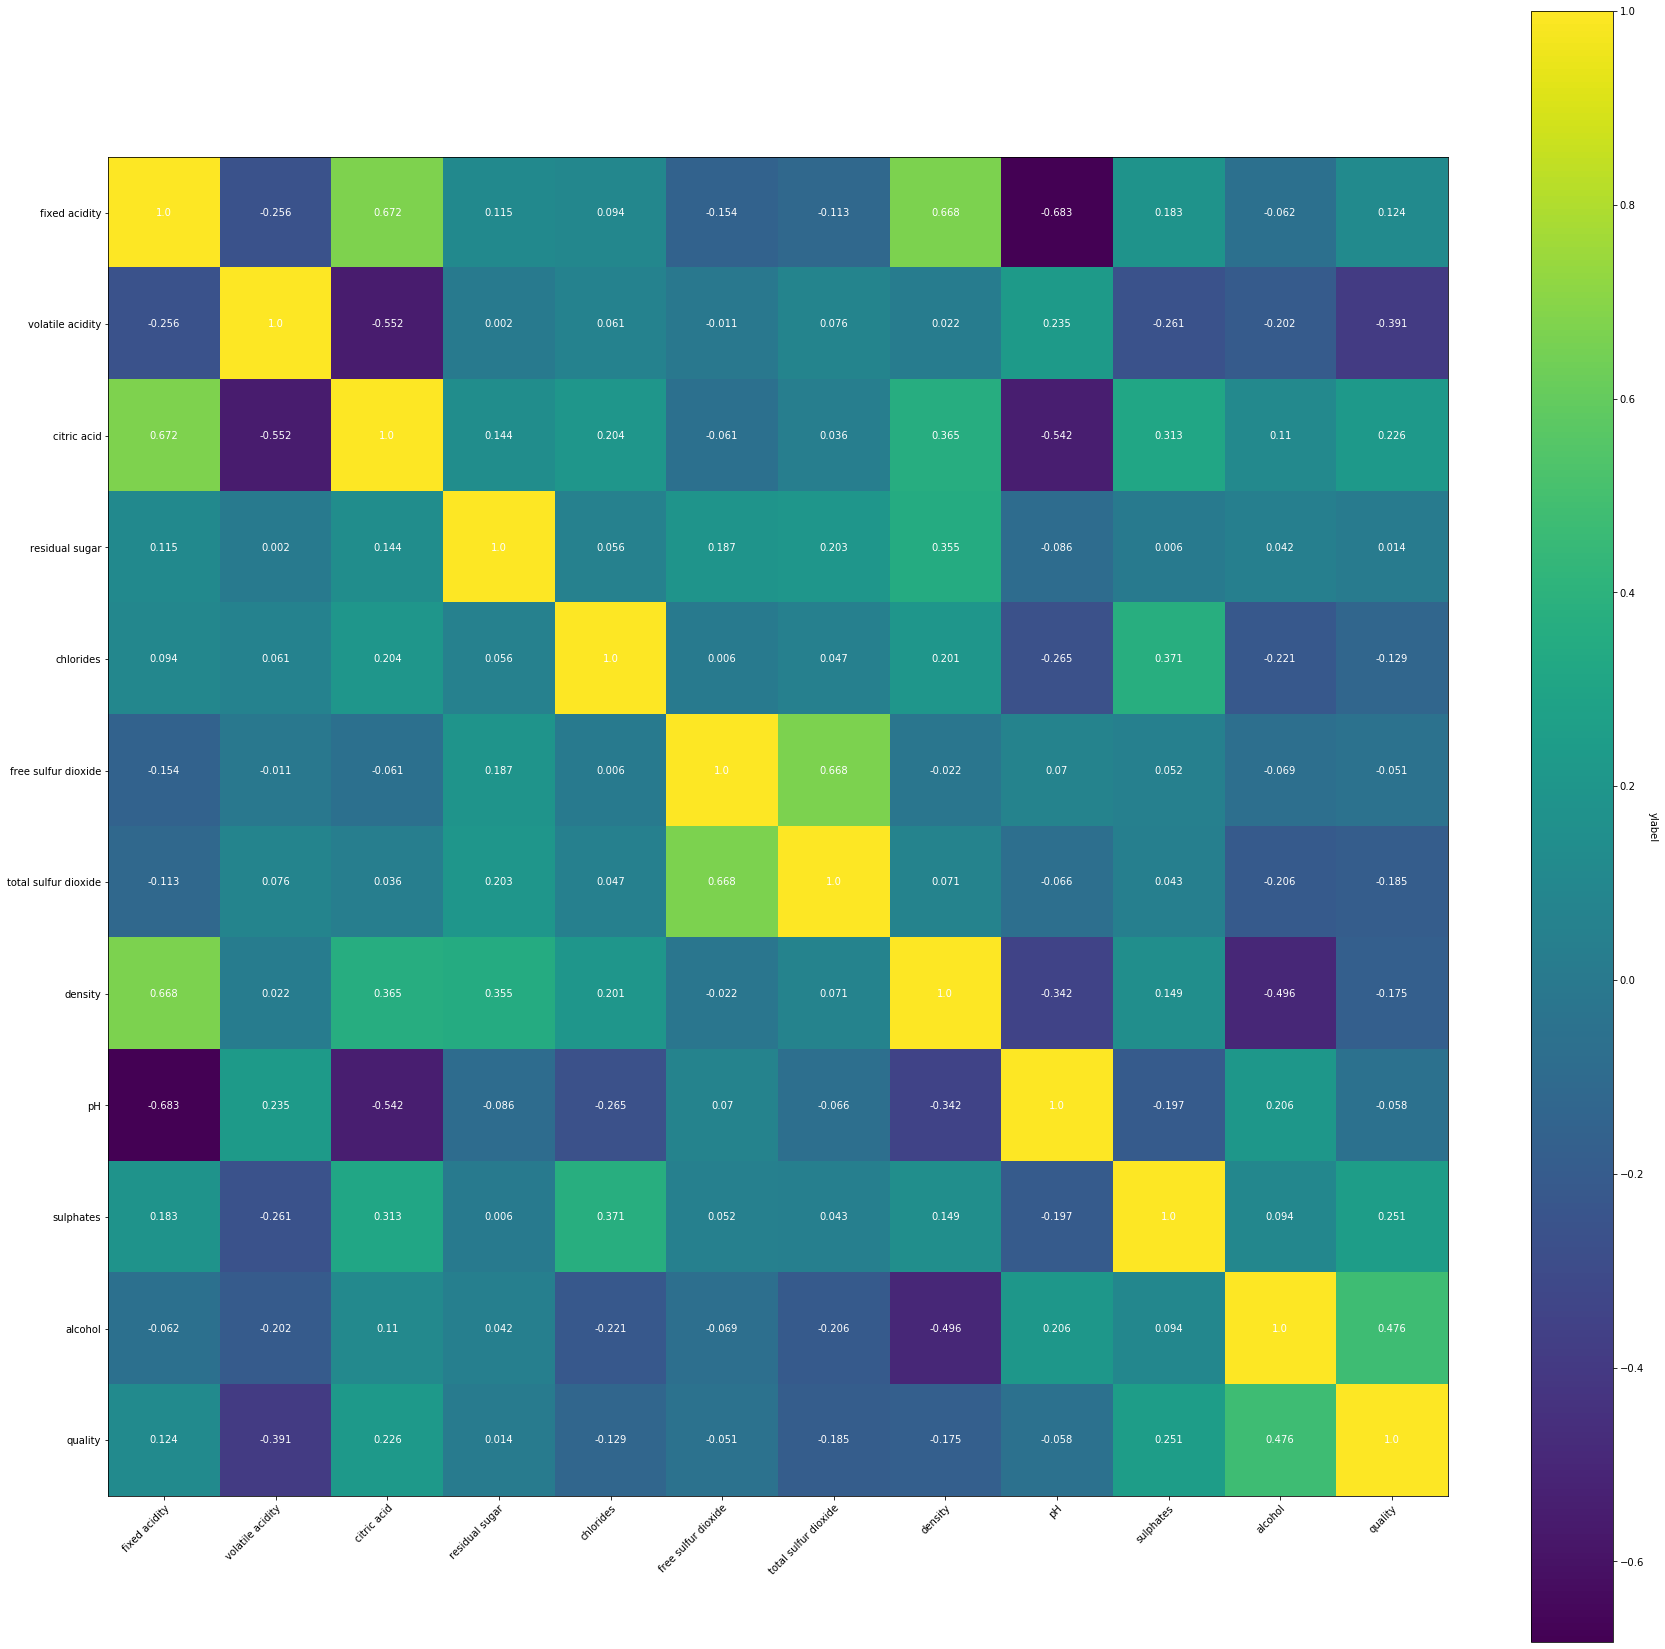

In [11]:
corre = wine.corr()
data_lab = corre.columns.tolist()
data = np.array(corre)
data = np.around(data, 3)

fig, ax = plt.subplots(figsize=(30,30))
im = ax.imshow(data)
#Showing all the ticks
ax.set_xticks(np.arange(len(data_lab)))
ax.set_yticks(np.arange(len(data_lab)))

#Setting the label with respective list of enteries
ax.set_xticklabels(data_lab)
ax.set_yticklabels(data_lab) 

#Reorientating xtick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor' )
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ylabel', rotation=-90, va="bottom")
for i in range(len(data_lab)):
    for j in range(len(data_lab)):
        text = ax.text(j, i, data[i, j],
                      ha="center", va="center", color="w")     
plt.show()

### Check the average quality of wine

# Model Prediction and Evaluation

In [13]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import modelComp

In [14]:
wineModel = modelComp.modelCompile(wine[pred_col], wine[targ], True)

# Classification Models

In [16]:
#Model objects 
Random = RandomForestClassifier(random_state=50)
Decision = DecisionTreeClassifier(random_state=50)
Logistics = LogisticRegression(random_state=50)
sv = SVC(random_state=50)

# Regression Models

In [17]:
#Model objects
RandomR = RandomForestRegressor(random_state=50)
DecisionR = DecisionTreeRegressor(random_state=50)
LogisticsR = LinearRegression()
svR_ = SVR()

In [18]:
models = [Random, Decision, Logistics, sv]
models_ = [RandomR, DecisionR, LogisticsR, svR_]
mod = ['Random Forest', 'Decision Tree', 'Logistics/Linear', 'Support Vector']

In [23]:
#RMSE Results of classification models
results = []
for i in models:
    x_train, x_test,  = wineModel.modBuilder(i, 0.3, 50)
    wineModel.pred_(x_test, False)
    rms = wineModel.accuracy_()
    results.append(rms)

#RMSE Results of regression models
results_ = []
for i in models_:
    x_train, x_test  = wineModel.modBuilder(i, 0.3, 50)
    wineModel.pred_(x_test, True)
    rms = wineModel.accuracy_()
    results_.append(rms)


In [24]:
#Printing the RMSE of the regression and classification models side by side in a dataframe 
pd.DataFrame({'Model Name': mod, 'RMSE Class Value' :results, 'RMSE Reg Value': results_})

,Model Name,RMSE Class Value,RMSE Reg Value
0,Random Forest,0.619139,0.620819
1,Decision Tree,0.803638,0.830412
2,Logistics/Linear,0.702673,0.708578
3,Support Vector,0.696718,0.711512


# Feature Importances

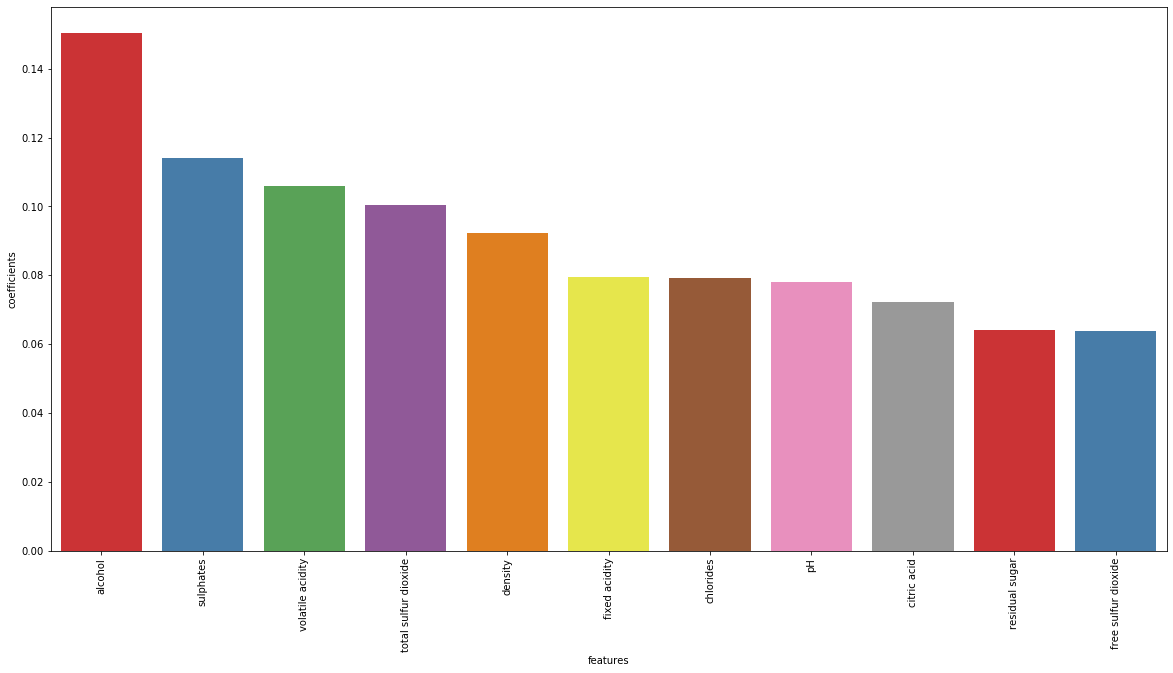

In [28]:
Ran = wineModel.modBuilder(Random, 0.3, 50)
wineModel.cf_('importance', pred_col)

### Compare predicted and actual values

# Evaluation of the performance of the algorithm

<h3> RMSE </h3> 
<p> After testing with 4 different models in classification and regression form, random forest classification gave the best and least RMSE value of 0.62. This means that, averagely, an error of + or - 0.62 could be obtained from our prediction. This is good but other models could still be employed to see for better performance. </p>